# Ans1-

Polynomial functions are a type of kernel function used in machine learning algorithms, particularly in support vector machines (SVMs), to implicitly map data into higher-dimensional spaces, enabling the modeling of complex relationships.

# Ans2-

Accuracy: 0.67


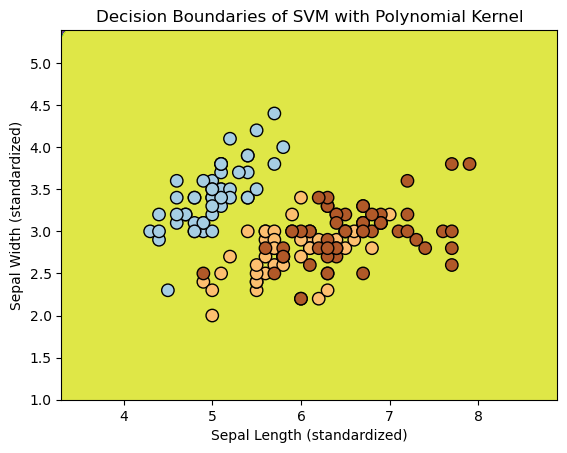

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking only the first two features for simplicity
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM classifier with a polynomial kernel
poly_svm = SVC(kernel='poly', degree=3)  # Using a polynomial kernel of degree 3
poly_svm.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = poly_svm.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = poly_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=80, linewidth=1, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Decision Boundaries of SVM with Polynomial Kernel')
plt.show()


# Ans3-

Increasing the value of epsilon in Support Vector Regression (SVR) typically results in an increase in the number of support vectors.

# Ans4-

# Ans5-

In [2]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import joblib

# Load the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (standardization in this case)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an instance of the SVC classifier
svc = SVC()

# Train the classifier on the training data
svc.fit(X_train, y_train)

# Use the trained classifier to predict labels for the testing data
y_pred = svc.predict(X_test)

# Evaluate the performance of the classifier using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Additional evaluation metrics
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Tune hyperparameters using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Train the tuned classifier on the entire dataset
tuned_svc = SVC(**best_params)
tuned_svc.fit(X, y)

# Save the trained classifier to a file for future use
joblib.dump(tuned_svc, 'tuned_svm_model.joblib')


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


['tuned_svm_model.joblib']